### Topic Model

#### Disable warnings

In [160]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

#### Import Important Libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
import spacy
import re, random, os
import string, pprint
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

#### Import important class and functions

In [162]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#### Import data set

In [163]:
df_FIN=pd.read_excel('./FIN_AUG_SEP.xlsx',encoding='utf-8')

In [164]:
df_SCM=pd.read_excel('./SCM_AUG_SEP.xlsx',encoding='utf-8')

In [165]:
df_FIN.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01


In [166]:
df_SCM.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,2-Significant,Oracle Platform Cloud,Internet of Things Cloud Service,11268,Internet of Things Cloud Service,Connected Worker,Generic Issues,18.2.3,Cloud-Implementation,1,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,Closed,Not Entitled,2018-08-03 01:39:45,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10402,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,11.12.1.0.0,Cloud-Post Go Live,2,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,Closed,Resolved with Solution,2018-08-17 12:42:31,2017-07-15 19:47:15,391,2018-08-10 10:07:55


In [167]:
df_FIN.columns

Index(['Bugged', 'Severity', 'Product Family', 'Product Area', 'Product ID',
       'Product', 'Component', 'Sub Component', 'Product Version',
       'Root Cause', 'SR', 'Known Issue', 'Reason Code', 'Summary', 'Status',
       'Substatus', 'Last Updated On', 'Date Opened', 'Days Open',
       'Date Closed'],
      dtype='object')

In [168]:
df_SCM.columns

Index(['Bugged', 'Severity', 'Product Family', 'Product Area', 'Product ID',
       'Product', 'Component', 'Sub Component', 'Product Version',
       'Root Cause', 'SR', 'Known Issue', 'Reason Code', 'Summary', 'Status',
       'Substatus', 'Last Updated On', 'Date Opened', 'Days Open',
       'Date Closed'],
      dtype='object')

In [169]:
list_df=[df_FIN,df_SCM]

In [184]:
df=pd.concat(list_df,ignore_index=True)

In [185]:
df.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01


In [186]:
print(len(df.index))

23865


In [187]:
list(df.columns)

['Bugged',
 'Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'Root Cause',
 'SR',
 'Known Issue',
 'Reason Code',
 'Summary',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Days Open',
 'Date Closed']

#### Drop any duplications

In [188]:
df=df.drop_duplicates().reset_index(drop=True)

In [189]:
df

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01
2,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.12.1.0.0,Cloud-Implementation,3,Yes,01 Product Defects,We can not do the drilldown from the defined f...,Closed,Resolved with Solution,2018-08-02 01:40:04,2018-07-25 16:15:11,7,2018-08-01 23:47:24
3,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Ledgers and Balancing Segment Value Ass...,11.13.18.02.0,Cloud-Post Go Live,4,Yes,07 Setup / Configuration,Remove the assigned balancing segment from a l...,Closed,Resolved with Workaround,2018-08-23 16:39:27,2018-08-09 06:18:46,7,2018-08-16 13:49:48
4,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Accounts Payable Balances-Close Payable...,Manage Payables Accounting Periods,11.13.18.02.0,Cloud-Post Go Live,5,No,07 Setup / Configuration,Unable to activate AP Journal Entry Rule Set X...,Closed,Resolved with Solution,2018-09-06 16:39:41,2018-08-23 07:46:37,7,2018-08-30 15:15:14
5,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418,Oracle Fusion Receivables Cloud Service,Setup Module,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,6,Unspecified,01 Product Defects,"""Cannot insert record more than once"" on loadi...",Closed,Resolved with Workaround,2018-08-14 17:44:58,2018-07-31 07:19:34,7,2018-08-07 14:49:06
6,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10403,Oracle Fusion Financials Common Module Cloud S...,Functional Setup Manager,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,7,Yes,07 Setup / Configuration,How to create common Lookup under Common Looku...,Closed,Resolved with Solution,2018-09-05 02:31:52,2018-08-21 16:55:38,7,2018-08-29 00:16:36
7,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.13.18.02.0,Cloud-Post Go Live,8,Unspecified,07 Setup / Configuration,Unable to use Smartview post R13 upgrade,Closed,No fault found,2018-08-30 19:17:42,2018-08-23 07:33:12,7,2018-08-30 14:46:26
8,No,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Create and Manage Journals,Manage Journals,11.13.18.02.0,Cloud-Implementation,9,Yes,"05 Performance, Sizing",Cannot Open Journal Page (Error 504),Closed,No fault found,2018-08-23 13:40:13,2018-08-09 03:37:10,7,2018-08-16 10:49:54
9,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Payments-Prepare and Record Payments,Manage Payables Payments,11.13.18.02.0,Cloud-Post Go Live,10,No,02 Enhancement Requests,Single Consolidated paym

In [190]:
print(len(df.index))

23865


In [191]:
df.columns=df.columns.astype(str)

In [192]:
#print(sum(df['SR'].isna()))
#df=df.loc[df['SR'].dropna()]

In [193]:
df.tail()

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
23860,Yes,2-Significant,Oracle Platform Cloud,Internet of Things Cloud Service,11268,Internet of Things Cloud Service,Production Monitoring,Generic Issues,NaN,Cloud-Post Go Live,9509,No,06 Svc Interruption / Outage,Unable to connect to production monitoring,Closed,Resolved with Solution,2018-09-27 15:50:19,2018-09-19 14:35:09,1,2018-09-20 13:32:56
23861,Yes,2-Significant,Procurement,Procurement,2458,Oracle Fusion Purchasing,Purchase Orders,Manage Orders,11.13.18.05.0,Software-Install,9510,No,05.Setting or Incorrect Config,Table validated Value set does not display nay...,Closed,Resolved with Solution,2018-09-19 12:38:49,2018-09-11 14:36:17,1,2018-09-12 09:33:23
23862,Yes,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.05.0,Cloud-Provisioning,9511,Yes,07 Setup / Configuration,Error : The value of the attribute INVENTORY_I...,Closed,Resolved with Solution,2018-10-04 23:27:59,2018-09-27 08:22:11,1,2018-09-27 21:06:40
23863,Yes,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.05.0,Cloud-Post Go Live,9512,No,06 Svc Interruption / Outage,Order Line stuck in Credit Check for SO#22690 ...,Closed,Resolved with Solution,2018-10-05 19:44:47,2018-09-28 08:59:09,0,2018-09-28 17:46:04
23864,Yes,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.02.0,Cloud-Implementation,9513,Unspecified,"09 Break Fix,Functional Errors",Lines awaiting shipping but not updateable,Closed,No fault found,2018-10-06 22:31:21,2018-09-29 18:34:21,0,2018-09-29 20:51:58


#### Drop if any tickets with no serial number

In [194]:
#print(sum(df['SR'].isnull()))
#df=df.loc[~df['SR'].isnull()]

In [195]:
df.isna().sum()

Bugged                6
Severity              2
Product Family        3
Product Area          3
Product ID            0
Product               0
Component             0
Sub Component         0
Product Version    1081
Root Cause            0
SR                    0
Known Issue           0
Reason Code           0
Summary               0
Status                0
Substatus             0
Last Updated On       0
Date Opened           0
Days Open             8
Date Closed           2
dtype: int64

In [196]:
df['Summary'][:50]

0      Creation of account and account code combination
1     [IMPL SPT] An application error occurred on ed...
2     We can not do the drilldown from the defined f...
3     Remove the assigned balancing segment from a l...
4     Unable to activate AP Journal Entry Rule Set X...
5     "Cannot insert record more than once" on loadi...
6     How to create common Lookup under Common Looku...
7              Unable to use Smartview post R13 upgrade
8                  Cannot Open Journal Page (Error 504)
9     Single Consolidated payment for Multiple Busin...
10    How do we upload Fiscal Classifications to the...
11    Manage Data Access for Users - No Roles listed...
12                     Statements are not being emailed
13               Add DFF to Chart of Account Value Sets
14              Expense Report is not Ready for Payment
15    Load and Process BAI2 Format bank Statement fi...
16    AR Automatic Receipts are not getting generate...
17    [IMPL SPT] Cannot find out the privilege w

In [197]:
df.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01


In [198]:
df=df.rename(columns=lambda x : x.replace(" ","_"))
df

,Bugged,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,Root_Cause,SR,Known_Issue,Reason_Code,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01
2,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.12.1.0.0,Cloud-Implementation,3,Yes,01 Product Defects,We can not do the drilldown from the defined f...,Closed,Resolved with Solution,2018-08-02 01:40:04,2018-07-25 16:15:11,7,2018-08-01 23:47:24
3,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Ledgers and Balancing Segment Value Ass...,11.13.18.02.0,Cloud-Post Go Live,4,Yes,07 Setup / Configuration,Remove the assigned balancing segment from a l...,Closed,Resolved with Workaround,2018-08-23 16:39:27,2018-08-09 06:18:46,7,2018-08-16 13:49:48
4,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Accounts Payable Balances-Close Payable...,Manage Payables Accounting Periods,11.13.18.02.0,Cloud-Post Go Live,5,No,07 Setup / Configuration,Unable to activate AP Journal Entry Rule Set X...,Closed,Resolved with Solution,2018-09-06 16:39:41,2018-08-23 07:46:37,7,2018-08-30 15:15:14
5,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418,Oracle Fusion Receivables Cloud Service,Setup Module,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,6,Unspecified,01 Product Defects,"""Cannot insert record more than once"" on loadi...",Closed,Resolved with Workaround,2018-08-14 17:44:58,2018-07-31 07:19:34,7,2018-08-07 14:49:06
6,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10403,Oracle Fusion Financials Common Module Cloud S...,Functional Setup Manager,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,7,Yes,07 Setup / Configuration,How to create common Lookup under Common Looku...,Closed,Resolved with Solution,2018-09-05 02:31:52,2018-08-21 16:55:38,7,2018-08-29 00:16:36
7,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.13.18.02.0,Cloud-Post Go Live,8,Unspecified,07 Setup / Configuration,Unable to use Smartview post R13 upgrade,Closed,No fault found,2018-08-30 19:17:42,2018-08-23 07:33:12,7,2018-08-30 14:46:26
8,No,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Create and Manage Journals,Manage Journals,11.13.18.02.0,Cloud-Implementation,9,Yes,"05 Performance, Sizing",Cannot Open Journal Page (Error 504),Closed,No fault found,2018-08-23 13:40:13,2018-08-09 03:37:10,7,2018-08-16 10:49:54
9,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Payments-Prepare and Record Payments,Manage Payables Payments,11.13.18.02.0,Cloud-Post Go Live,10,No,02 Enhancement Requests,Single Consolidated paym

In [199]:
df.columns

Index(['Bugged', 'Severity', 'Product_Family', 'Product_Area', 'Product_ID',
       'Product', 'Component', 'Sub_Component', 'Product_Version',
       'Root_Cause', 'SR', 'Known_Issue', 'Reason_Code', 'Summary', 'Status',
       'Substatus', 'Last_Updated_On', 'Date_Opened', 'Days_Open',
       'Date_Closed'],
      dtype='object')

In [200]:
df.tail(2)

,Bugged,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,Root_Cause,SR,Known_Issue,Reason_Code,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Closed
23863,Yes,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.05.0,Cloud-Post Go Live,9512,No,06 Svc Interruption / Outage,Order Line stuck in Credit Check for SO#22690 ...,Closed,Resolved with Solution,2018-10-05 19:44:47,2018-09-28 08:59:09,0,2018-09-28 17:46:04
23864,Yes,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.02.0,Cloud-Implementation,9513,Unspecified,"09 Break Fix,Functional Errors",Lines awaiting shipping but not updateable,Closed,No fault found,2018-10-06 22:31:21,2018-09-29 18:34:21,0,2018-09-29 20:51:58


### Text Anlaysis

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23865 entries, 0 to 23864
Data columns (total 20 columns):
Bugged             23859 non-null object
Severity           23863 non-null object
Product_Family     23862 non-null object
Product_Area       23862 non-null object
Product_ID         23865 non-null object
Product            23865 non-null object
Component          23865 non-null object
Sub_Component      23865 non-null object
Product_Version    22784 non-null object
Root_Cause         23865 non-null object
SR                 23865 non-null int64
Known_Issue        23865 non-null object
Reason_Code        23865 non-null object
Summary            23865 non-null object
Status             23865 non-null object
Substatus          23865 non-null object
Last_Updated_On    23865 non-null object
Date_Opened        23865 non-null object
Days_Open          23857 non-null object
Date_Closed        23863 non-null object
dtypes: int64(1), object(19)
memory usage: 3.6+ MB


In [202]:
df.Summary=df.Summary.apply(lambda x : str(x))

In [203]:
df.tail()

,Bugged,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,Root_Cause,SR,Known_Issue,Reason_Code,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Closed
23860,Yes,2-Significant,Oracle Platform Cloud,Internet of Things Cloud Service,11268,Internet of Things Cloud Service,Production Monitoring,Generic Issues,NaN,Cloud-Post Go Live,9509,No,06 Svc Interruption / Outage,Unable to connect to production monitoring,Closed,Resolved with Solution,2018-09-27 15:50:19,2018-09-19 14:35:09,1,2018-09-20 13:32:56
23861,Yes,2-Significant,Procurement,Procurement,2458,Oracle Fusion Purchasing,Purchase Orders,Manage Orders,11.13.18.05.0,Software-Install,9510,No,05.Setting or Incorrect Config,Table validated Value set does not display nay...,Closed,Resolved with Solution,2018-09-19 12:38:49,2018-09-11 14:36:17,1,2018-09-12 09:33:23
23862,Yes,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.05.0,Cloud-Provisioning,9511,Yes,07 Setup / Configuration,Error : The value of the attribute INVENTORY_I...,Closed,Resolved with Solution,2018-10-04 23:27:59,2018-09-27 08:22:11,1,2018-09-27 21:06:40
23863,Yes,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.05.0,Cloud-Post Go Live,9512,No,06 Svc Interruption / Outage,Order Line stuck in Credit Check for SO#22690 ...,Closed,Resolved with Solution,2018-10-05 19:44:47,2018-09-28 08:59:09,0,2018-09-28 17:46:04
23864,Yes,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,11488,Oracle Fusion Order Management Cloud Service,Manage Orders,Create / Manage Orders,11.13.18.02.0,Cloud-Implementation,9513,Unspecified,"09 Break Fix,Functional Errors",Lines awaiting shipping but not updateable,Closed,No fault found,2018-10-06 22:31:21,2018-09-29 18:34:21,0,2018-09-29 20:51:58


In [204]:
df.Summary=df.Summary.apply(lambda x : x.encode('ascii',errors='ignore').decode())

In [205]:
df.shape

(23865, 20)

#### Remove non characters from the data Summary

In [206]:
list_nonchar=['_','-','[',']',':',')','(','.',',','\"','\'','/','{','}','%','?','0','1','2','3','4','5','6','7','8','9']

In [207]:
def replace(list_nc):
    for text in df:
        for char in list_nc:
            df.Summary=df.Summary.apply(lambda x : x.replace(char, ' '))

In [208]:
replace(list_nonchar)

In [209]:
df_dict=df[['Summary']]

In [210]:
df_dict['text'] = df_dict['Summary'].astype(str)

In [211]:
df_dict=df_dict.drop(columns=['Summary'])

In [212]:
df_dict.text=df_dict.text.apply(lambda x : x.lower())

In [213]:
df_dict.head()

,text
0,creation of account and account code combination
1,impl spt an application error occurred on ed...
2,we can not do the drilldown from the defined f...
3,remove the assigned balancing segment from a l...
4,unable to activate ap journal entry rule set x...


#### Clean the data further by stemming and lemmatizing the data to obtain the core words

In [214]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [215]:
def preprocess(document, lemma=True):
    document = document.lower()
    words = word_tokenize(document)
    words = [word for word in words if word not in stopwords.words("english")]
    if lemma:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    else:
        words = [stemmer.stem(word) for word in words]
    document = " ".join(words)
    return document

In [216]:
df_dict.text=df_dict.text.apply(lambda x : preprocess(x))

#### Get words from each ticket Summary and check the frequency of words

In [217]:
word_dist=pd.DataFrame(pd.Series(' '.join(df_dict.text).split()).value_counts()).reset_index(drop=False)

In [218]:
word_dist=word_dist.rename(columns={'index':'word',0:'freq'})

In [219]:
word_dist.head()

,word,freq
0,error,3080
1,invoice,2832
2,impl,2402
3,account,2384
4,spt,2359


In [220]:
wldf=word_dist

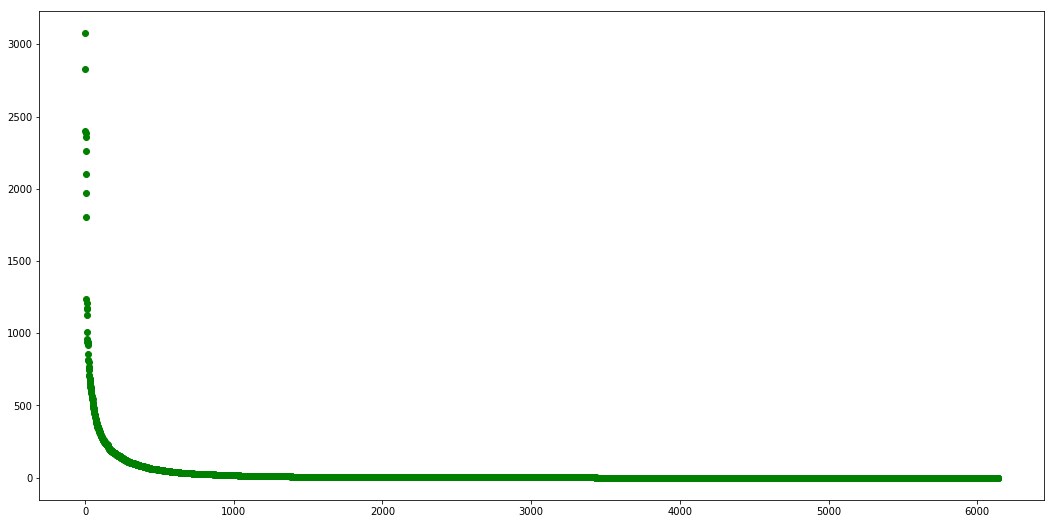

In [221]:
plt.figure(figsize=(18,9))
plt.scatter(x=wldf.index,y=wldf.freq,c='g')

In [222]:
wldf.head()

,word,freq
0,error,3080
1,invoice,2832
2,impl,2402
3,account,2384
4,spt,2359


In [223]:
wldf.tail()

,word,freq
6137,undo,1
6138,esbase,1
6139,manul,1
6140,eelk,1
6141,scheudle,1


In [224]:
len(wldf.index)

6142

#### Check words with very less and very high frequency to eliminate the outlier frequencies

In [225]:
print(len(wldf[wldf.freq<2]))
print(len(wldf[wldf.freq>4000]))

2708
0


In [226]:
wldf_new=wldf[~wldf.freq.isin(wldf.freq.iloc[:1])]
wldf_new=wldf_new[~wldf_new.freq.isin(['1'])]

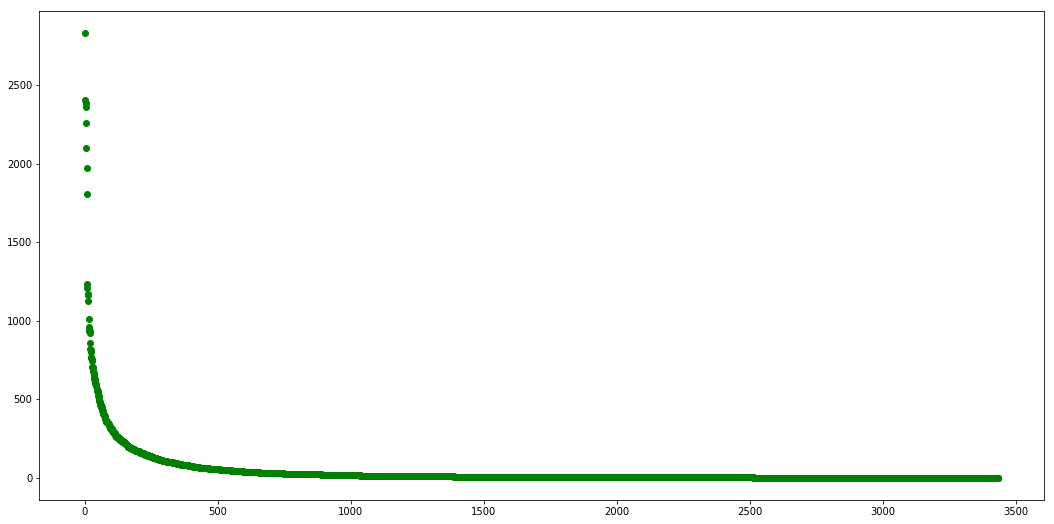

In [227]:
plt.figure(figsize=(18,9))
plt.scatter(x=wldf_new.index,y=wldf_new.freq,c='g')

In [228]:
len(wldf_new.index)


3433

In [229]:
wldf_new.head()

,word,freq
1,invoice,2832
2,impl,2402
3,account,2384
4,spt,2359
5,create,2261


In [230]:
list_words=list(wldf_new.word)

In [231]:
list_words[:5]

['invoice', 'impl', 'account', 'spt', 'create']

#### Exclude words with frequency 1 and frequency>4000

In [232]:
wldf_excU=wldf[wldf.freq.isin(wldf.freq.iloc[:1])]
wldf_excL=wldf[wldf.freq.isin(['1'])]

In [233]:
wldf_excL.head()

,word,freq
3434,reinstall,1
3435,autofill,1
3436,payble,1
3437,shiptopartycontactnumber,1
3438,shortcuts,1


In [234]:
wldf_excU

,word,freq
0,error,3080


In [235]:
wldf_exc=pd.concat([wldf_excL,wldf_excU],axis=0)
print(wldf_exc[:2])
print(wldf_exc[-2:])

           word  freq
3434  reinstall     1
3435   autofill     1
          word  freq
6141  scheudle     1
0        error  3080


In [236]:
wldf_exc_list=list(wldf_exc.word)

In [237]:
wldf_exc_list[:5]

['reinstall', 'autofill', 'payble', 'shiptopartycontactnumber', 'shortcuts']

In [238]:
def exc_list_word(txt):
    querywords = txt.split()
    resultwords  = [word for word in querywords if word.lower() not in wldf_exc_list]
    result = ' '.join(resultwords)
    return(result)

In [239]:
df_dict.text=df_dict.text.apply(lambda x : exc_list_word(x))

In [240]:
df_dict.text.head()

0            creation account account code combination
1    impl spt application occur edit distributions ...
2                    drilldown define financial report
3           remove assign balance segment legal entity
4        unable activate ap journal entry rule set xla
Name: text, dtype: object

In [241]:
df_txt=df_dict.text

In [242]:
data = df_txt.values.tolist()
data[:5]

['creation account account code combination',
 'impl spt application occur edit distributions page coder',
 'drilldown define financial report',
 'remove assign balance segment legal entity',
 'unable activate ap journal entry rule set xla']

In [243]:
def sent_to_words(sentences, deacc=True):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  

In [244]:
data_words = list(sent_to_words(data))
print(data_words)

[['creation', 'account', 'account', 'code', 'combination'], ['impl', 'spt', 'application', 'occur', 'edit', 'distributions', 'page', 'coder'], ['drilldown', 'define', 'financial', 'report'], ['remove', 'assign', 'balance', 'segment', 'legal', 'entity'], ['unable', 'activate', 'ap', 'journal', 'entry', 'rule', 'set', 'xla'], ['insert', 'record', 'load', 'nd', 'receipt', 'batch', 'use', 'spreadsheet'], ['create', 'common', 'lookup', 'common', 'lookups', 'use', 'setup', 'maintenance', 'enable', 'dff'], ['unable', 'use', 'smartview', 'post', 'upgrade'], ['open', 'journal', 'page'], ['single', 'consolidate', 'payment', 'multiple', 'business', 'unit', 'invoice'], ['upload', 'fiscal', 'classifications', 'party', 'tax', 'profile', 'site', 'level'], ['manage', 'data', 'access', 'users', 'roles', 'list', 'role', 'drop', 'menu'], ['statements', 'email'], ['add', 'dff', 'chart', 'account', 'value', 'set'], ['expense', 'report', 'ready', 'payment'], ['load', 'process', 'bai', 'format', 'bank', 'sta

#### Remove stop words

In [245]:
stop_words = stopwords.words('english') + list(string.punctuation)

In [246]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [247]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [248]:
data_words

[['creation', 'account', 'account', 'code', 'combination'],
 ['impl',
  'spt',
  'application',
  'occur',
  'edit',
  'distributions',
  'page',
  'coder'],
 ['drilldown', 'define', 'financial', 'report'],
 ['remove', 'assign', 'balance', 'segment', 'legal', 'entity'],
 ['unable', 'activate', 'ap', 'journal', 'entry', 'rule', 'set', 'xla'],
 ['insert', 'record', 'load', 'nd', 'receipt', 'batch', 'use', 'spreadsheet'],
 ['create',
  'common',
  'lookup',
  'common',
  'lookups',
  'use',
  'setup',
  'maintenance',
  'enable',
  'dff'],
 ['unable', 'use', 'smartview', 'post', 'upgrade'],
 ['open', 'journal', 'page'],
 ['single',
  'consolidate',
  'payment',
  'multiple',
  'business',
  'unit',
  'invoice'],
 ['upload',
  'fiscal',
  'classifications',
  'party',
  'tax',
  'profile',
  'site',
  'level'],
 ['manage',
  'data',
  'access',
  'users',
  'roles',
  'list',
  'role',
  'drop',
  'menu'],
 ['statements', 'email'],
 ['add', 'dff', 'chart', 'account', 'value', 'set'],
 ['ex

In [249]:
data_words_nostops = remove_stopwords(data_words)

In [250]:
data_words_nostops

[['creation', 'account', 'account', 'code', 'combination'],
 ['impl',
  'spt',
  'application',
  'occur',
  'edit',
  'distributions',
  'page',
  'coder'],
 ['drilldown', 'define', 'financial', 'report'],
 ['remove', 'assign', 'balance', 'segment', 'legal', 'entity'],
 ['unable', 'activate', 'ap', 'journal', 'entry', 'rule', 'set', 'xla'],
 ['insert', 'record', 'load', 'nd', 'receipt', 'batch', 'use', 'spreadsheet'],
 ['create',
  'common',
  'lookup',
  'common',
  'lookups',
  'use',
  'setup',
  'maintenance',
  'enable',
  'dff'],
 ['unable', 'use', 'smartview', 'post', 'upgrade'],
 ['open', 'journal', 'page'],
 ['single',
  'consolidate',
  'payment',
  'multiple',
  'business',
  'unit',
  'invoice'],
 ['upload',
  'fiscal',
  'classifications',
  'party',
  'tax',
  'profile',
  'site',
  'level'],
 ['manage',
  'data',
  'access',
  'users',
  'roles',
  'list',
  'role',
  'drop',
  'menu'],
 ['statements', 'email'],
 ['add', 'dff', 'chart', 'account', 'value', 'set'],
 ['ex

In [150]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [151]:
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [253]:
data_lemmatized=lemmatization(data_words_nostops)

In [255]:
id2word = corpora.Dictionary(data_lemmatized)
id2word

In [257]:
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1)]


In [155]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('account', 2), ('code', 1), ('combination', 1), ('creation', 1)]]

#### LDA model with 9 topics

In [259]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=200,
                                           update_every=1,
                                           chunksize=750,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [261]:
corpus=[id2word.doc2bow(text) for text in data_lemmatized]
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1)]


#### Print the topics and words that are co-occuring

In [262]:
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.154*"approval" + 0.076*"notification" + 0.055*"email" + 0.045*"approve" + '
  '0.044*"supply" + 0.038*"management" + 0.037*"pende" + 0.024*"journal" + '
  '0.024*"approver" + 0.018*"post"'),
 (1,
  '0.101*"line" + 0.052*"ship" + 0.048*"invoice" + 0.041*"price" + '
  '0.026*"default" + 0.024*"type" + 0.023*"release" + 0.022*"base" + '
  '0.021*"shipment" + 0.021*"tax"'),
 (2,
  '0.169*"item" + 0.080*"cost" + 0.052*"show" + 0.052*"report" + '
  '0.051*"inventory" + 0.029*"page" + 0.023*"see" + 0.021*"upgrade" + '
  '0.021*"attachment" + 0.020*"detail"'),
 (3,
  '0.082*"issue" + 0.054*"manage" + 0.053*"datum" + 0.053*"fbdi" + '
  '0.030*"procurement" + 0.030*"schedule" + 0.029*"creation" + '
  '0.028*"template" + 0.026*"access" + 0.025*"task"'),
 (4,
  '0.079*"po" + 0.078*"requisition" + 0.046*"impl" + 0.045*"spt" + '
  '0.039*"request" + 0.033*"stick" + 0.030*"number" + 0.025*"receive" + '
  '0.024*"upload" + 0.023*"generate"'),
 (5,
  '0.113*"supplier" + 0.079*"purchase" + 0.0

#### Check coherence score, anything above 0.35 is good for the model

In [263]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30061104180045034


#### Visualize the model for better understanding

In [264]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.391861  0.016033       1        1  22.650103
4     -0.185020 -0.019341       2        1  14.651547
1      0.081419 -0.385145       3        1  12.077691
2      0.087827  0.262092       4        1  10.301118
6      0.071732  0.004046       5        1   9.315988
5      0.078955 -0.000010       6        1   8.896455
3      0.090978  0.072173       7        1   8.381584
7      0.082158  0.009365       8        1   7.159460
0      0.083812  0.040787       9        1   6.566053, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
269   Default  4265.000000         order  4265.000000  30.0000  30.0000
537   Default  2454.000000          item  2454.000000  29.0000  29.0000
106   Default  1425.000000      approval  1425.000000  28.0000  28.0000
179   Default  1725.000000          line  1725.000000  27.0000  27.0000
321   Default  1419.000000      supplier  1419.000000  26.0000  26.0000
38    Default  2154.000000        create  2154.000000  25.0000  25.0000
375   Default  1626.000000            po  1626.000000  24.0000  24.0000
1623  Default  1609.000000   requisition  1609.000000  23.0000  23.0000
146   Default  1174.000000        change  1174.000000  22.0000  22.0000
28    Default  1880.000000        unable  1880.000000  21.0000  21.0000
344   Default  1158.000000          cost  1158.000000  20.0000  20.0000
111   Default   966.000000         issue   966.000000  19.0000  19.0000
755   Default   986.000000      purchase   986.000000  18.0000  18.0000
0     Default  1572.000000       account  1572.000000  17.0000  17.0000
719   Default   871.000000          plan   871.000000  16.0000  16.0000
177   Default  1354.000000          work  1354.000000  15.0000  15.0000
109   Default   707.000000  notification   707.000000  14.0000  14.0000
611   Default   894.000000          ship   894.000000  13.0000  13.0000
116   Default   767.000000          able   767.000000  12.0000  12.0000
8     Default   945.000000          impl   945.000000  11.0000  11.0000
11    Default   922.000000           spt   922.000000  10.0000  10.0000
329   Default   758.000000          show   758.000000   9.0000   9.0000
50    Default   816.000000       invoice   816.000000   8.0000   8.0000
101   Default   705.000000        update   705.000000   7.0000   7.0000
15    Default   749.000000        report   749.000000   6.0000   6.0000
536   Default   739.000000     inventory   739.000000   5.0000   5.0000
150   Default   612.000000          need   612.000000   4.0000   4.0000
67    Default   643.000000        manage   643.000000   3.0000   3.0000
64    Default   629.000000         datum   629.000000   2.0000   2.0000
481   Default  1048.000000          sale  1048.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
106    Topic9  1424.637329      approval  1425.536743   2.7226  -1.8709
109    Topic9   706.716858  notification   707.616272   2.7220  -2.5720
71     Topic9   505.658020         email   506.557373   2.7215  -2.9067
796    Topic9   420.266144       approve   421.165588   2.7211  -3.0917
2397   Topic9   411.608612        supply   412.508392   2.7211  -3.1125
439    Topic9   351.031860    management   351.931396   2.7207  -3.2717
1056   Topic9   342.189453         pende   343.089081   2.7206  -3.2972
25     Topic9   224.115692       journal   225.014923   2.7193  -3.7204
495    Topic9   222.367371      approver   223.266785   2.7192  -3.7283
44     Topic9   162.207642          post   163.106949   2.7177  -4.0437
1068   Topic9   160.891769      revision   161.791534   2.7177  -4.0519
449    Topic9   150.753433       confirm   151.653015   2.7173  -4.1170
792    Topic9   147.236359  cancellation   148.136154   2.7172  -4.1406
24     Topic9   139.437012         entry   140.3363